<a href="https://colab.research.google.com/github/Sarah1542/Test4-Loan-Approval-Prediction-Description/blob/main/Loan_Approval_Prediction_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-----------------Imports-------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#-----------Uplode & Read DataSet---------


In [ ]:
from google.colab import files
import io
uploaded = files.upload()
print("Uploaded files:", uploaded.keys())
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
pd.set_option('display.max_columns', None)
print(df.head())

Saving loan_approval_dataset.csv to loan_approval_dataset (2).csv
Uploaded files: dict_keys(['loan_approval_dataset (2).csv'])
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382   

#--------------Data Cleaning-----------------


In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.describe())
cat_col=[' education',' self_employed',' loan_status']
le=LabelEncoder()# encode categorical features
for col in cat_col:
  df[col]=le.fit_transform(df[col])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
loan_id   

#-----------Dataset Visualization-------------


In [ ]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


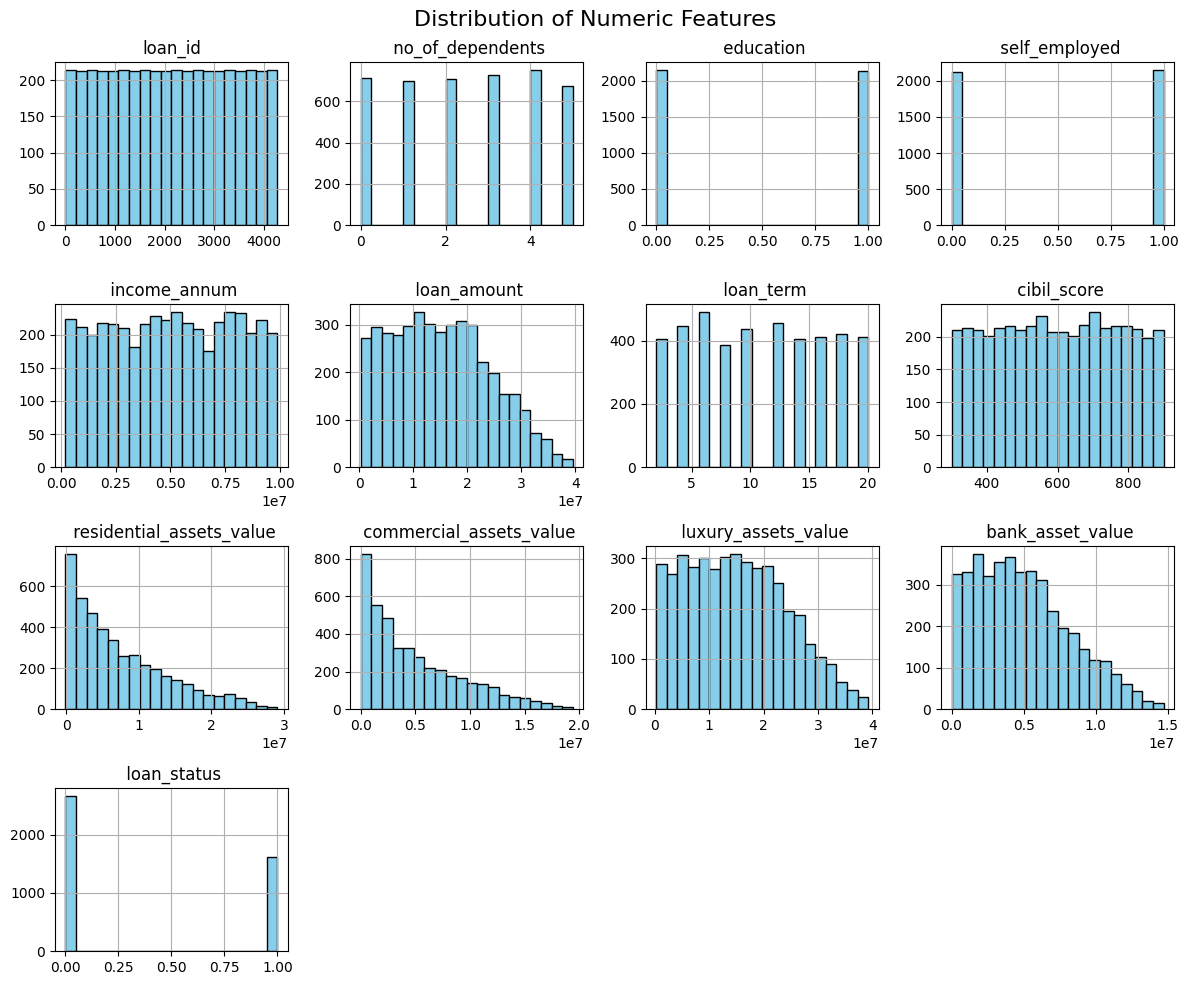

In [ ]:
#"Distribution of Numeric Features"
numeric_cols = ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
                ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
df[numeric_cols].hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


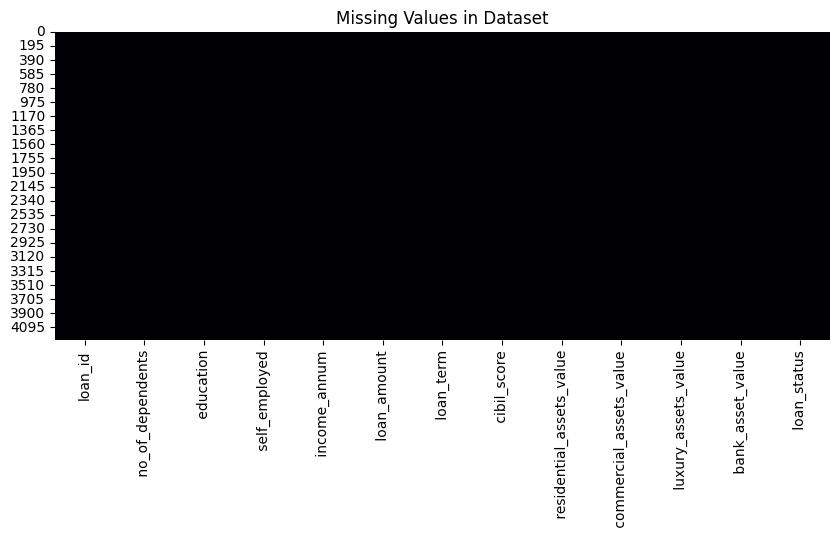

In [ ]:
#"Missing Values in Dataset"
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values in Dataset")
plt.show()



/tmp/ipython-input-3081194339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Feature", y="Value", data=df_melted, palette="Set2")


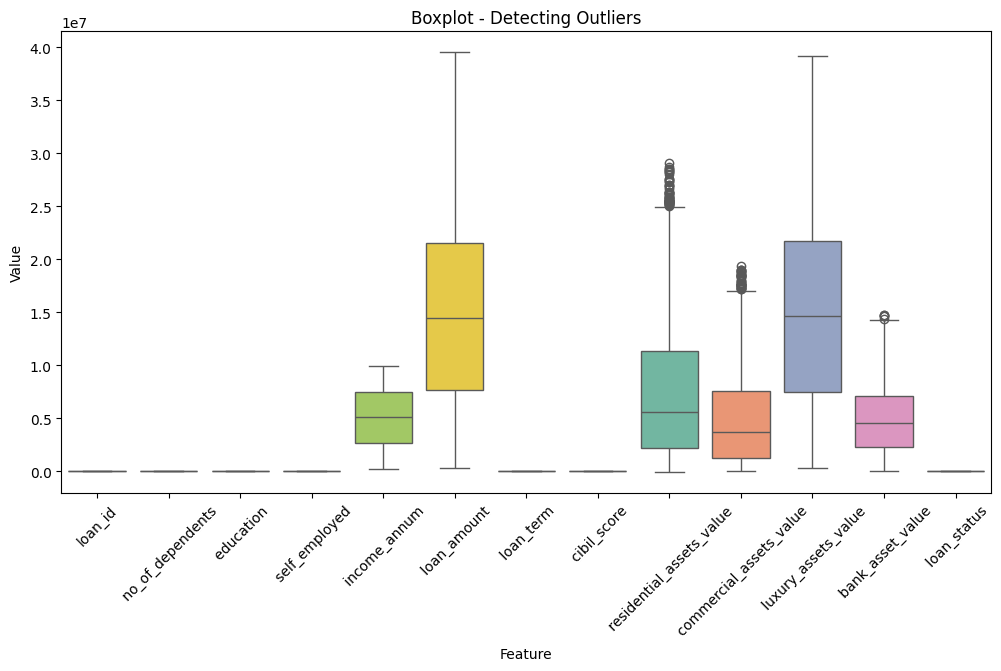

In [ ]:
#"Boxplot - Detecting Outliers"
df_melted = df[numeric_cols].melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(12,6))
sns.boxplot(x="Feature", y="Value", data=df_melted, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot - Detecting Outliers")
plt.show()


#---------------Split Data Train/Test----------

In [ ]:
x=df.drop([' loan_status','loan_id'],axis=1) #feature
y=df[' loan_status'] #target
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


------------------------Dealing With Imbalnced Data------------------------

In [ ]:
smote=SMOTE(random_state=42) # Apply SMOTE to handle class imbalance and avoid model bias
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)
print("Before SMOTE: ", y_train.value_counts())
print("After SMOTE", y_train_res.value_counts())

Before SMOTE:   loan_status
0    2125
1    1290
Name: count, dtype: int64
After SMOTE  loan_status
1    2125
0    2125
Name: count, dtype: int64


-----------------------------scaling-------------------------

In [ ]:
scaler=StandardScaler()
x_train_res=pd.DataFrame(scaler.fit_transform(x_train_res),columns=x_train_res.columns)

----------------------Logistic Regression----------------------

In [ ]:
model_LG=LogisticRegression()
model_LG.fit(x_train_res,y_train_res)
y_pred_LG=model_LG.predict(x_test)

In [ ]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_LG, digits=3))


Logistic Regression Report:
              precision    recall  f1-score   support

           0      0.992     0.900     0.944       531
           1      0.858     0.988     0.918       323

    accuracy                          0.933       854
   macro avg      0.925     0.944     0.931       854
weighted avg      0.941     0.933     0.934       854



--------------------------------DT Model---------------------------------

In [ ]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train_res,y_train_res)
y_pred_DT=model_dt.predict(x_test)

---------------------precision, recall, and F1-score-------------------



In [ ]:
print("Decision Tree Report:")
DT_report=print(classification_report(y_test, y_pred_DT, digits=3))


Decision Tree Report:
              precision    recall  f1-score   support

           0      0.983     0.895     0.937       531
           1      0.849     0.975     0.908       323

    accuracy                          0.925       854
   macro avg      0.916     0.935     0.922       854
weighted avg      0.933     0.925     0.926       854



----------------------comparizon between models-----------------------

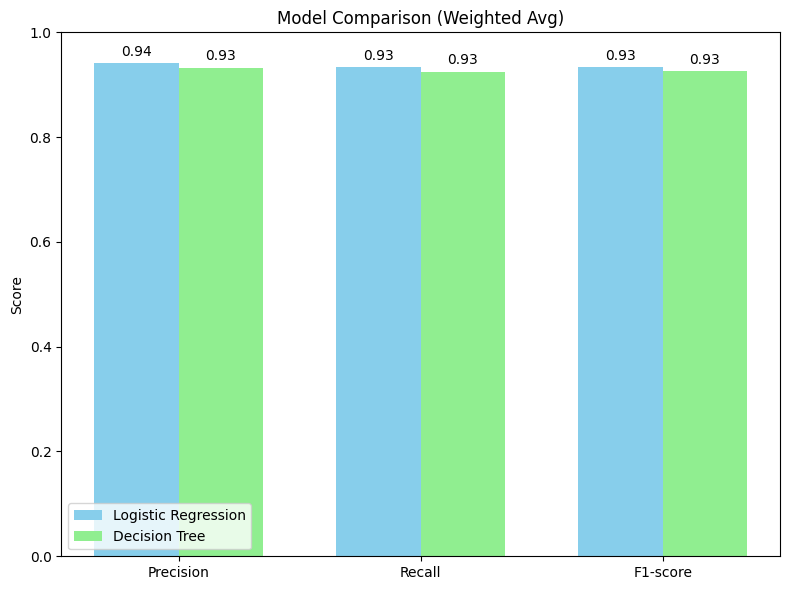

In [ ]:
log_report = classification_report(y_test, y_pred_LG, digits=3, output_dict=True)
dt_report = classification_report(y_test, y_pred_DT, digits=3, output_dict=True)
precision_log = log_report['weighted avg']['precision']
recall_log = log_report['weighted avg']['recall']
f1_log = log_report['weighted avg']['f1-score']
precision_dt = dt_report['weighted avg']['precision']
recall_dt = dt_report['weighted avg']['recall']
f1_dt = dt_report['weighted avg']['f1-score']
metrics = ['Precision', 'Recall', 'F1-score']
log_values = [precision_log, recall_log, f1_log]
dt_values = [precision_dt, recall_dt, f1_dt]
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, log_values, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x + width/2, dt_values, width, label='Decision Tree', color='lightgreen')
ax.set_ylabel('Score')
ax.set_title('Model Comparison (Weighted Avg)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.ylim(0,1)
plt.tight_layout()
plt.show()
